In [1]:
# importing libraries
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import os

# tensorflow import of layers , model , etc
from tensorflow.keras.utils import to_categorical                      # used for converting labels to one hot encode
from tensorflow.keras.models import Sequential                         # for making sequential deep learning model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping                              # for finding optimal mode;

# image processing library
from PIL import Image                                                  # for reading image
from PIL import ImageOps                                               # for converting Image to Grayscale
from tensorflow.keras.preprocessing.image import array_to_img          # for viewing image from array

# classification report 
from sklearn.metrics import classification_report

In [2]:

# providing the path of folder in which all data is present
# data_folder_path = r'C:\data\\'
# data_folder_path = r'C:\Users\PC\Downloads\CEP data unzipped\data\\'
data_folder_path = r'Data/' 

In [3]:
#dictionary to label all traffic signs class.
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [4]:
# read excel file found at path name made from combining 'data_folder_path (path in Jupyter) and 'Train_data_label.xlsx' (file name)
# store this in variable 'train_data_labels'

train_data_labels = pd.read_excel(data_folder_path + 'Train_data_label.xlsx')

# overexplained:
# stored as a variable so that later, this 'train_data_labels' variable can be combined with each of the individual image paths (see 'Path' col in head below) using a For function

train_data_labels.head()

,ClassId,Path
0,20,Train/20/00020_00000_00000.png
1,20,Train/20/00020_00000_00001.png
2,20,Train/20/00020_00000_00002.png
3,20,Train/20/00020_00000_00003.png
4,20,Train/20/00020_00000_00004.png


In [5]:
# seeing unique of classes in train data
train_data_labels['ClassId'].unique()

array([20,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42])

In [6]:
# seeing unique number of classes in train data
train_data_labels['ClassId'].nunique()

43

In [7]:
# creating a column names as img_arr which will be used for storing the images array
train_data_labels['color_img_arr'] = None
train_data_labels['grayscale_img_arr'] = None

In [ ]:
train_data_labels.head()



In [9]:
#Going through the path column of data and joining it with the data_folder path and then reading the image and converting it to array and then saving it to img_arr column of data

for index , each_path in zip(train_data_labels.index , train_data_labels['Path']):
    
    #overexplained:
    #use Zip function to create a list of coupled data pairs consisting of:
        #1 train_data_labels.index i.e. the numbers in 1st column of train_data_lables excel file
        #2 train_data_labels['Path'] i.e. the paths in the path column
            #e.g print(list(zip(train_data_labels.index , train_data_labels['Path']))) will give: 
                #[(0, 'Train/20/00020_00000_00000.png'), (1, 'Train/20/00020_00000_00001.png')...] 
                #zip function tutorial https://www.youtube.com/watch?v=ALWe-tbrzQU&t=170s
    #for functions creates two new variables, 'index' and 'each_path' and assigns 1&2 to them respectively in each iteration of the for loop
    
    complete_path_image = os.path.join(data_folder_path , each_path)

    #joins data_folder_path (i.e.'Data/) with each_path (the path in path column)
    #e.g. after te last iteration complete_path_image = 'Data/Train/42/00042_00007_00029.png'
    #this tells the program where to find the last image in the folder
     
    image = Image.open(complete_path_image)
    image_resized = image.resize((30,30))
    
    #open the image stored at location in variable 'complete_path_image', and store that in new variable called image
    #resize the image to 30x30 and store that in variable 'image_resized'
    
    # color images
    image_array = np.array(image_resized)
    
    #convert the resized image into an array
    #each image is converted into a matrix, each pixel within the matrix has a height, width, and channel number associated with it
        #3 channels (RGB) for color
        #a grayscale score of up to 255 for grayscale images
    
    train_data_labels.iat[index , 2] = image_array 
    
    #taking the image array/matrix and putting it into the relevant cell in the dataframe (can see these in the columns in head output below)
    
    # grayscale images
    grayscale_img = ImageOps.grayscale(image_resized)   # converting image to graycscale
    grayscale_image_array = np.array(grayscale_img)
    grayscale_image_array.resize(30,30,1)
    train_data_labels.iat[index , 3] = grayscale_image_array 
    
    #repeat process above for grayscale

In [10]:
train_data_labels.head()

,ClassId,Path,color_img_arr,grayscale_img_arr
0,20,Train/20/00020_00000_00000.png,"[[[46, 51, 56], [48, 51, 56], [49, 51, 54], [5...","[[[50], [51], [51], [54], [69], [88], [83], [5..."
1,20,Train/20/00020_00000_00001.png,"[[[47, 50, 55], [49, 50, 55], [50, 50, 54], [5...","[[[50], [50], [50], [51], [52], [49], [70], [8..."
2,20,Train/20/00020_00000_00002.png,"[[[51, 50, 57], [51, 51, 60], [50, 51, 57], [5...","[[[51], [52], [51], [51], [51], [52], [50], [7..."
3,20,Train/20/00020_00000_00003.png,"[[[49, 49, 54], [49, 50, 55], [48, 50, 55], [4...","[[[50], [50], [50], [49], [49], [47], [56], [6..."
4,20,Train/20/00020_00000_00004.png,"[[[50, 50, 55], [51, 50, 56], [51, 49, 54], [4...","[[[51], [51], [50], [49], [49], [50], [50], [4..."


In [11]:
#viewing random images

class_no = 14
random_num = 40

ran_class = train_data_labels[train_data_labels['ClassId'] == class_no]
color_class_img = ran_class.iloc[random_num , 2]
grayscale_class_img = ran_class.iloc[random_num , 3]

array_to_img(color_class_img)

In [12]:
array_to_img(grayscale_class_img)

In [13]:
#Repeating same process for test data

test_data_labels = pd.read_excel(data_folder_path + 'Test_data_label.xlsx')

test_data_labels.head()

,ClassId,Path
0,16,Test/00000.png
1,1,Test/00001.png
2,38,Test/00002.png
3,33,Test/00003.png
4,11,Test/00004.png


In [14]:
test_data_labels['ClassId'].unique()

array([16,  1, 38, 33, 11, 18, 12, 25, 35,  7, 23,  4,  9, 21, 20, 27,  3,
       13, 10,  5, 17, 34,  2,  8, 30, 24, 15, 26, 28, 22, 14, 32, 29,  6,
       36, 40, 41, 31, 19,  0, 39, 42, 37])

In [15]:
test_data_labels['ClassId'].nunique()

43

In [16]:
test_data_labels['color_img_arr'] = None
test_data_labels['grayscale_img_arr'] = None

In [17]:
test_data_labels.head()

,ClassId,Path,color_img_arr,grayscale_img_arr
0,16,Test/00000.png,None,None
1,1,Test/00001.png,None,None
2,38,Test/00002.png,None,None
3,33,Test/00003.png,None,None
4,11,Test/00004.png,None,None


In [18]:
for index , each_path in zip(test_data_labels.index , test_data_labels['Path']):
    
    complete_path_image = os.path.join(data_folder_path , each_path)
    
    image = Image.open(complete_path_image)
    image_resized = image.resize((30,30))
    
    # color images
    image_array = np.array(image_resized)
    test_data_labels.iat[index , 2] = image_array 
    
    # grayscale images
    grayscale_img = ImageOps.grayscale(image_resized)   # converting image to graycscale
    grayscale_image_array = np.array(grayscale_img)
    grayscale_image_array.resize(30,30,1)
    test_data_labels.iat[index , 3] = grayscale_image_array 

In [19]:
test_data_labels.head()

,ClassId,Path,color_img_arr,grayscale_img_arr
0,16,Test/00000.png,"[[[116, 140, 175], [116, 138, 171], [119, 138,...","[[[137], [135], [136], [135], [134], [133], [1..."
1,1,Test/00001.png,"[[[62, 72, 61], [89, 81, 63], [94, 82, 65], [9...","[[[68], [81], [84], [87], [75], [80], [74], [4..."
2,38,Test/00002.png,"[[[52, 40, 38], [51, 39, 37], [50, 38, 37], [5...","[[[43], [42], [41], [42], [41], [40], [41], [4..."
3,33,Test/00003.png,"[[[134, 127, 88], [95, 88, 58], [76, 67, 27], ...","[[[125], [87], [65], [82], [121], [162], [183]..."
4,11,Test/00004.png,"[[[36, 33, 29], [43, 38, 33], [46, 40, 36], [4...","[[[33], [39], [41], [40], [38], [38], [43], [5..."


<AxesSubplot:>

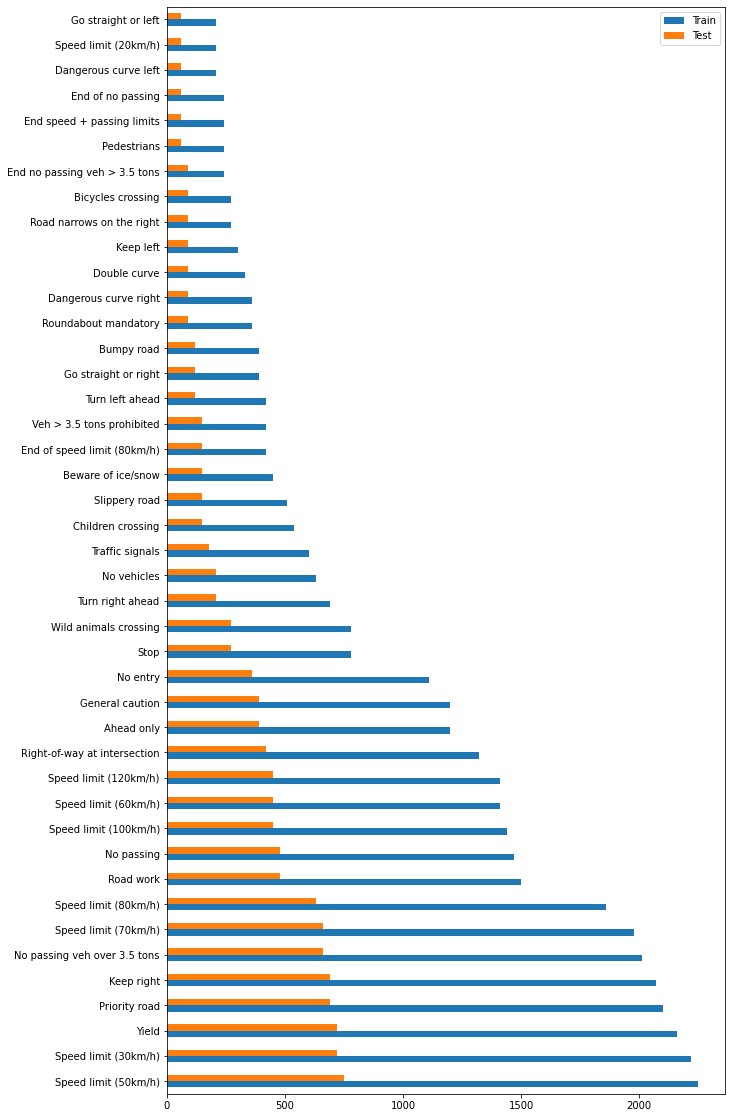

In [20]:
# distribution of classes in train and test data

# getting the class counts with actual names of class and storing them as dataframes
train_data_counts = train_data_labels['ClassId'].map(classes).value_counts().to_frame().rename(columns = {'ClassId' : 'Train'})
test_data_counts = test_data_labels['ClassId'].map(classes).value_counts().to_frame().rename(columns = {'ClassId' : 'Test'})

# merging both train and test data classes count
plot_data = pd.merge(train_data_counts , test_data_counts , left_index = True , right_index = True)

# ploting horizontal bar graph
plot_data.plot(kind = 'barh' , figsize = (10, 20))

In [21]:
# making train and test data array
x_train_color = np.array(train_data_labels['color_img_arr'].tolist())
x_train_grayscale = np.array(train_data_labels['grayscale_img_arr'].tolist())

x_test_color = np.array(test_data_labels['color_img_arr'].tolist())
x_test_grayscale = np.array(test_data_labels['grayscale_img_arr'].tolist())

#Converting the labels into one hot encoding
y_train = to_categorical(train_data_labels['ClassId'], 43)
y_test = to_categorical(test_data_labels['ClassId'], 43)

In [22]:
# Making CNN with Color Images

#Building the model
model = Sequential()

model.add(Conv2D(filters =  32, kernel_size = (5,5), activation = 'relu', input_shape  =  x_train_color.shape[1:]))
model.add(Conv2D(filters = 32, kernel_size = (5,5), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(rate = 0.25))

model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(rate = 0.25))

model.add(Flatten())

model.add(Dense(256, activation = 'relu'))
model.add(Dropout(rate = 0.5))

model.add(Dense(43, activation = 'softmax'))

In [23]:
# Early stopping
es = EarlyStopping( monitor ='val_loss', min_delta = 0.1 ,patience = 2 ,  mode = 'min' , restore_best_weights = True)  

In [24]:
#Compilation of the model
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [25]:
epochs = 15
history = model.fit(x_train_color, y_train,
                    batch_size = 32, epochs = epochs,
                    validation_data = (x_test_color , y_test) , 
                    callbacks = [es,])

Epoch 1/15
1226/1226 [==============================] - 130s 105ms/step - loss: 1.9689 - accuracy: 0.4951 - val_loss: 0.8306 - val_accuracy: 0.7842
Epoch 2/15
1226/1226 [==============================] - 131s 107ms/step - loss: 0.9123 - accuracy: 0.7314 - val_loss: 0.5394 - val_accuracy: 0.8473
Epoch 3/15
1226/1226 [==============================] - 129s 105ms/step - loss: 0.7016 - accuracy: 0.7905 - val_loss: 0.4724 - val_accuracy: 0.8666
Epoch 4/15
1226/1226 [==============================] - 131s 107ms/step - loss: 0.6174 - accuracy: 0.8149 - val_loss: 0.5640 - val_accuracy: 0.8348


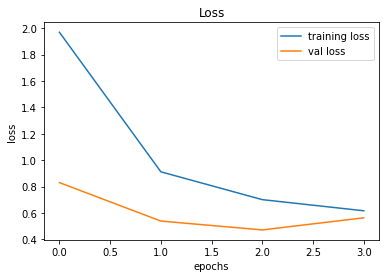

In [26]:
# plotting for loss

plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['val_loss'], label = 'val loss')

plt.title('Loss')

plt.xlabel('epochs')
plt.ylabel('loss')

plt.legend()
plt.show()

In [27]:
pred = model.predict(x_test_color)

pred_labels = np.argmax(pred, axis = -1)

In [28]:
print(classification_report(test_data_labels['ClassId'] , pred_labels , target_names = classes.values()))

                               precision    recall  f1-score   support

         Speed limit (20km/h)       1.00      0.22      0.36        60
         Speed limit (30km/h)       0.86      0.85      0.86       720
         Speed limit (50km/h)       0.86      0.87      0.87       750
         Speed limit (60km/h)       0.83      0.89      0.86       450
         Speed limit (70km/h)       0.84      0.92      0.87       660
         Speed limit (80km/h)       0.74      0.74      0.74       630
  End of speed limit (80km/h)       0.99      0.65      0.79       150
        Speed limit (100km/h)       0.86      0.88      0.87       450
        Speed limit (120km/h)       0.85      0.83      0.84       450
                   No passing       0.95      0.67      0.79       480
 No passing veh over 3.5 tons       0.80      0.98      0.88       660
 Right-of-way at intersection       0.86      0.90      0.88       420
                Priority road       0.90      0.93      0.92       690
     

In [29]:
# Making CNN with Grayscale Images

#Building the model
model = Sequential()

model.add(Conv2D(filters =  32, kernel_size = (5,5), activation = 'relu', input_shape  =  x_train_grayscale.shape[1:]))
model.add(Conv2D(filters = 32, kernel_size = (5,5), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(rate = 0.25))

model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(rate = 0.25))

model.add(Flatten())

model.add(Dense(256, activation = 'relu'))
model.add(Dropout(rate = 0.5))

model.add(Dense(43, activation = 'softmax'))

In [30]:
# Early stopping
es = EarlyStopping( monitor='val_loss', min_delta = 0.1 ,patience = 2 ,  mode = 'min' , restore_best_weights = True)

In [31]:
#Compilation of the model
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [32]:
epochs = 15
history = model.fit(x_train_grayscale , y_train,
                    batch_size = 32, epochs = epochs,
                    validation_data = (x_test_grayscale , y_test) , 
                    callbacks = [es,])

Epoch 1/15
1226/1226 [==============================] - 131s 106ms/step - loss: 1.6815 - accuracy: 0.5509 - val_loss: 0.5380 - val_accuracy: 0.8569
Epoch 2/15
1226/1226 [==============================] - 125s 102ms/step - loss: 0.6103 - accuracy: 0.8165 - val_loss: 0.3045 - val_accuracy: 0.9131
Epoch 3/15
1226/1226 [==============================] - 123s 101ms/step - loss: 0.4106 - accuracy: 0.8768 - val_loss: 0.2336 - val_accuracy: 0.9344
Epoch 4/15
1226/1226 [==============================] - 124s 101ms/step - loss: 0.3298 - accuracy: 0.9024 - val_loss: 0.2643 - val_accuracy: 0.9282


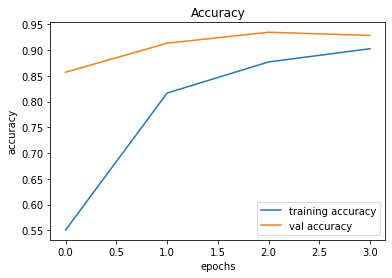

In [37]:
#plotting graphs for accuracy 

plt.plot(history.history['accuracy'], label = 'training accuracy')
plt.plot(history.history['val_accuracy'], label = 'val accuracy')

plt.xlabel('epochs')
plt.ylabel('accuracy')

plt.title('Accuracy')

plt.legend()
plt.show()

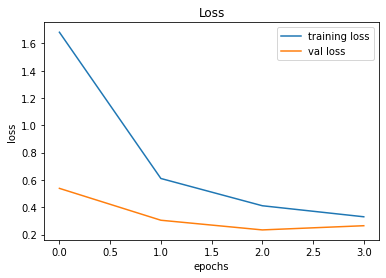

In [38]:
# plotting for loss

plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['val_loss'], label = 'val loss')

plt.title('Loss')

plt.xlabel('epochs')
plt.ylabel('loss')

plt.legend()
plt.show()

In [35]:
pred = model.predict(x_test_grayscale)

pred_labels = np.argmax(pred, axis = -1)

In [39]:
print(classification_report(test_data_labels['ClassId'] , pred_labels , target_names = classes.values()))

#Both models are good

                               precision    recall  f1-score   support

         Speed limit (20km/h)       1.00      0.40      0.57        60
         Speed limit (30km/h)       0.87      0.97      0.92       720
         Speed limit (50km/h)       0.96      0.96      0.96       750
         Speed limit (60km/h)       0.94      0.91      0.93       450
         Speed limit (70km/h)       0.96      0.95      0.95       660
         Speed limit (80km/h)       0.88      0.85      0.86       630
  End of speed limit (80km/h)       1.00      0.69      0.81       150
        Speed limit (100km/h)       0.91      0.90      0.90       450
        Speed limit (120km/h)       0.89      0.89      0.89       450
                   No passing       0.88      0.98      0.93       480
 No passing veh over 3.5 tons       0.95      0.99      0.97       660
 Right-of-way at intersection       0.92      0.88      0.90       420
                Priority road       0.97      0.97      0.97       690
     